## Classical package - H. Wickham’s ggplot2 Vignette

### Introduction to R Graphics with ggplot2

In [18]:
library("ggrepel")

ERROR: Error in library("ggrepel"): there is no package called ‘ggrepel’


In [17]:
install.packages("ggrepel")

Warning message in install.packages("ggrepel"):
“installation of package ‘ggrepel’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(ggplot2)

### ggplot2 VS Base Graphs for simple graphs

In [4]:
housing <- read.csv("Rgraphics/dataSets/landdata-states.csv")
head(housing[1:5])

State region Date    Home.Value Structure.Cost
1 AK    West   2010.25 224952     160599        
2 AK    West   2010.50 225511     160252        
3 AK    West   2009.75 225820     163791        
4 AK    West   2010.00 224994     161787        
5 AK    West   2008.00 234590     155400        
6 AK    West   2008.25 233714     157458

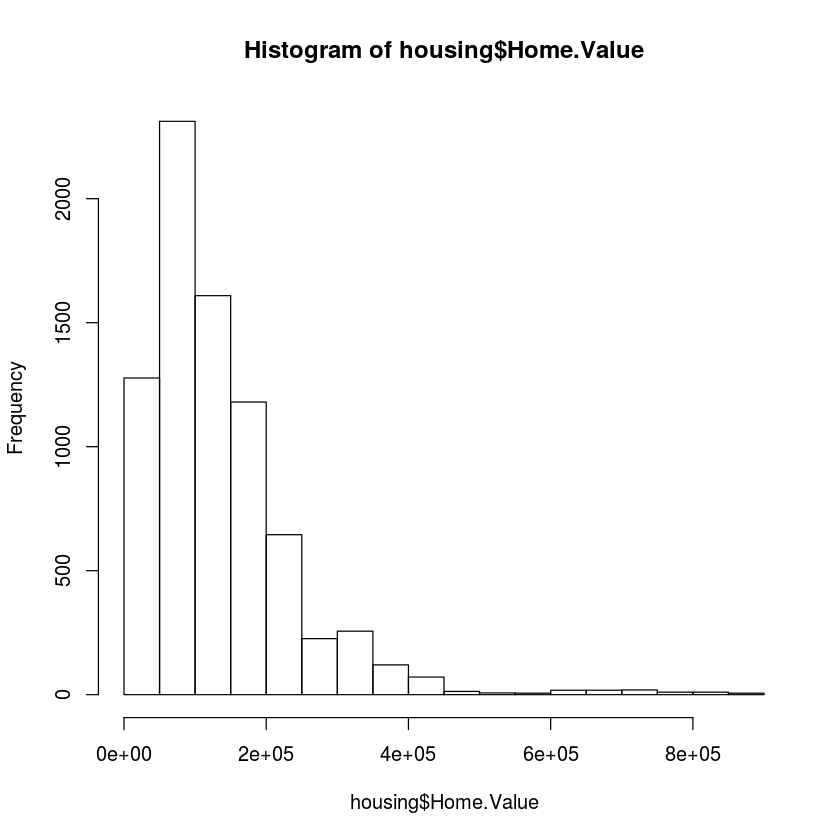

In [5]:
hist(housing$Home.Value)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


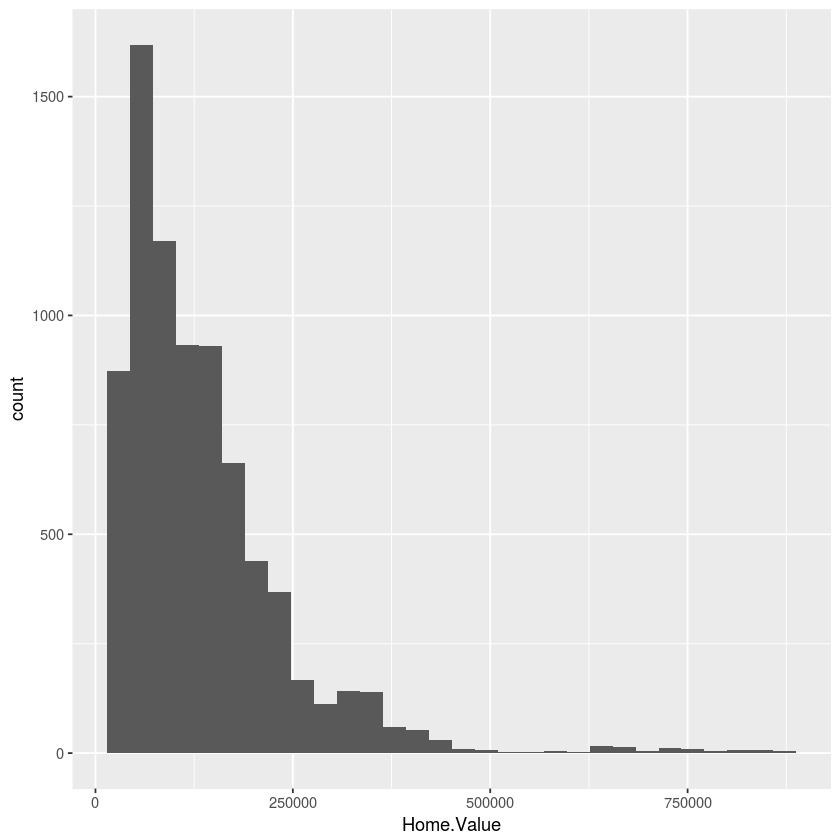

In [6]:
ggplot(housing, aes(x = Home.Value)) + geom_histogram()

### ggplot2 Base graphics VS ggplot for more complex graphs

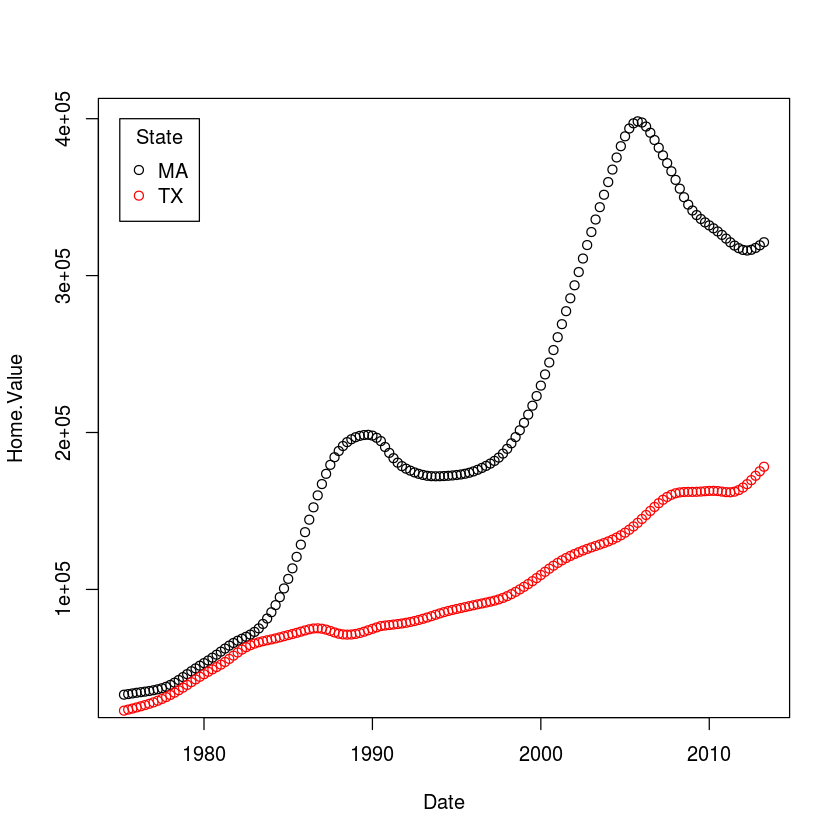

In [7]:
plot(Home.Value ~ Date, data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red", data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

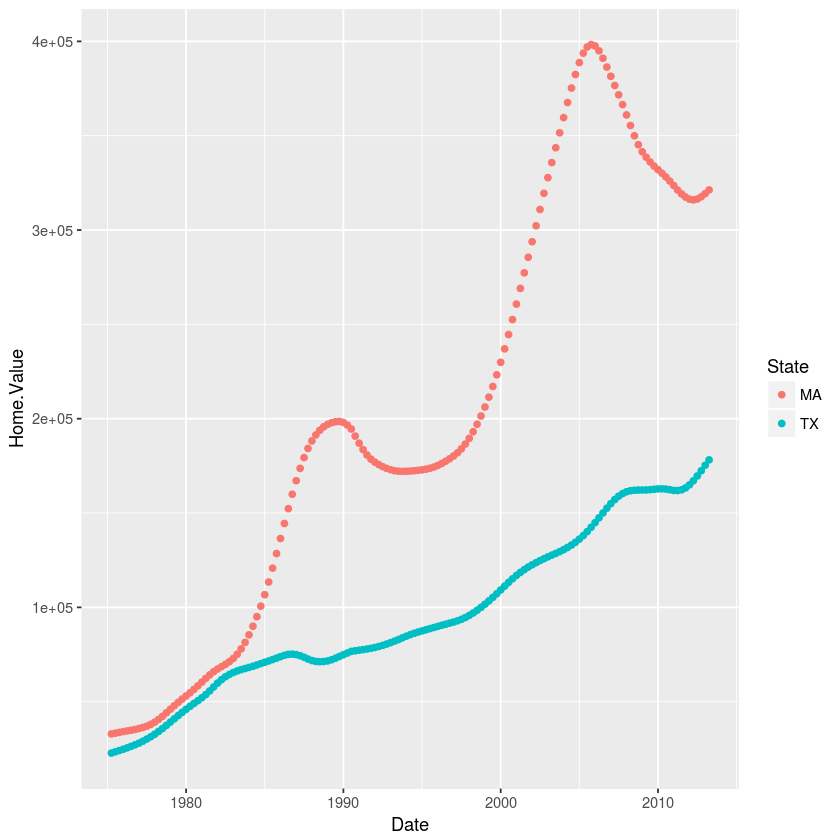

In [8]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

### Geometric Objects And Aesthetics

### Geometic Objects (geom)

In [9]:
help.search("geom_", package = "ggplot2")

### Points (Scatterplot)

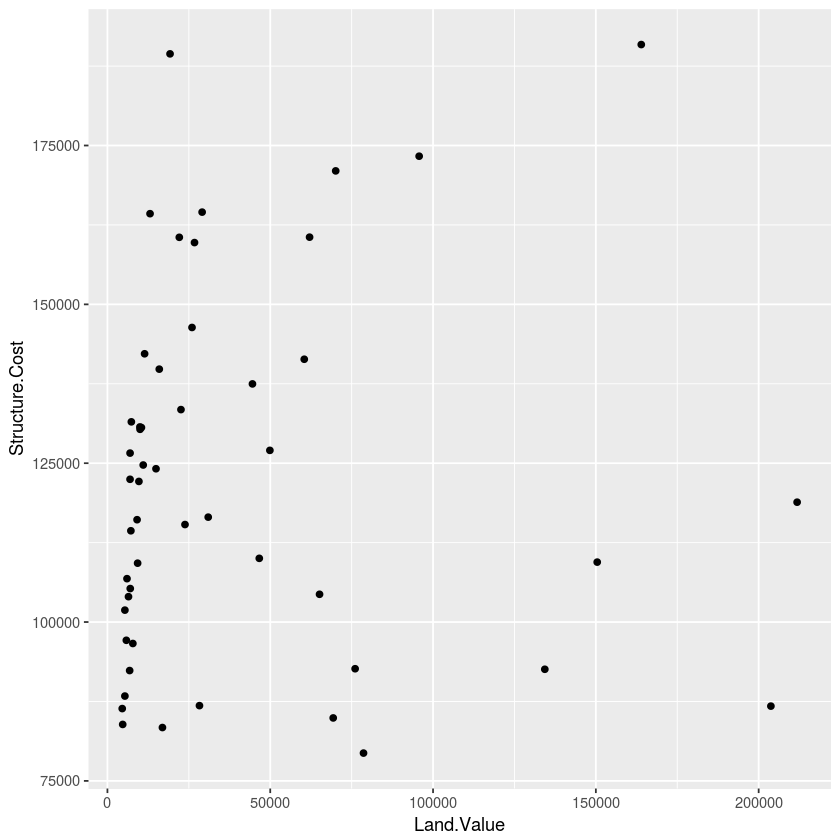

In [10]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

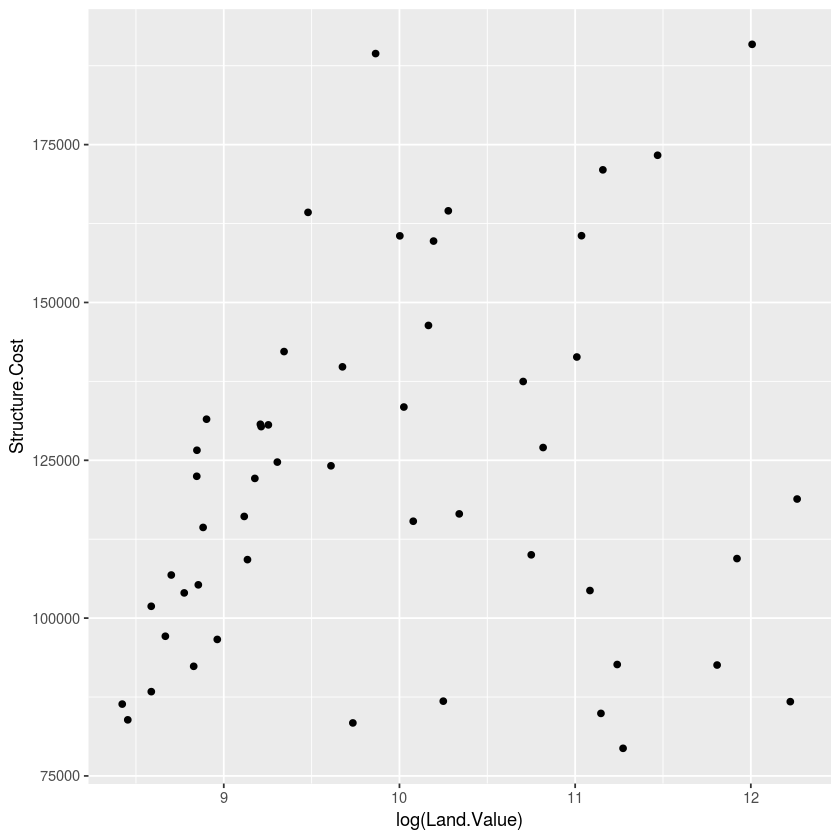

In [11]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

### Lines (Prediction Line)

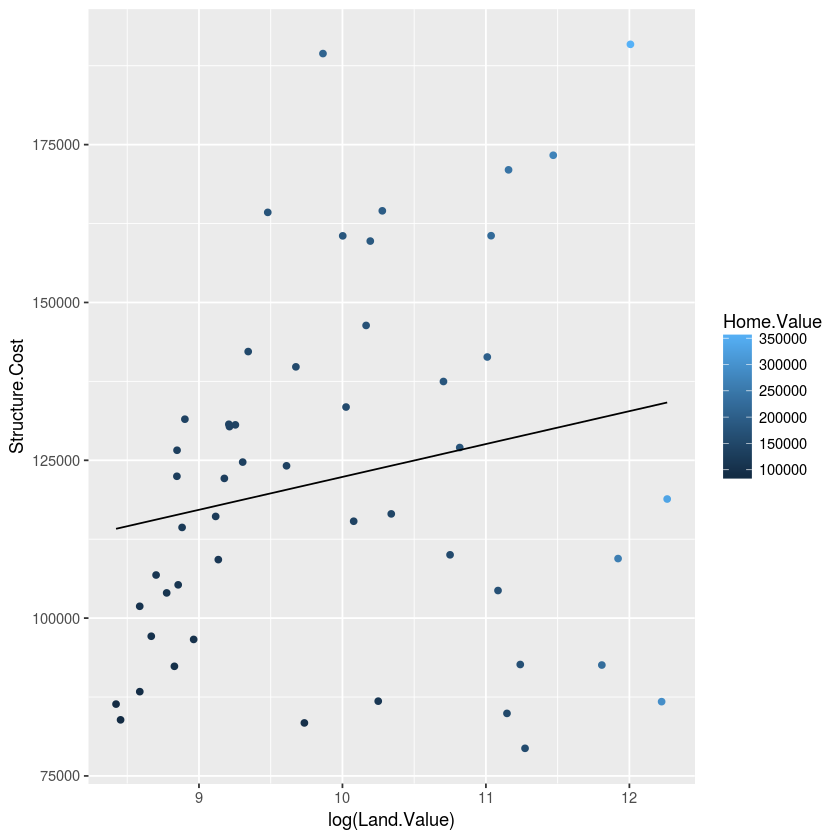

In [12]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC))

### Smoothers

`geom_smooth()` using method = 'loess'


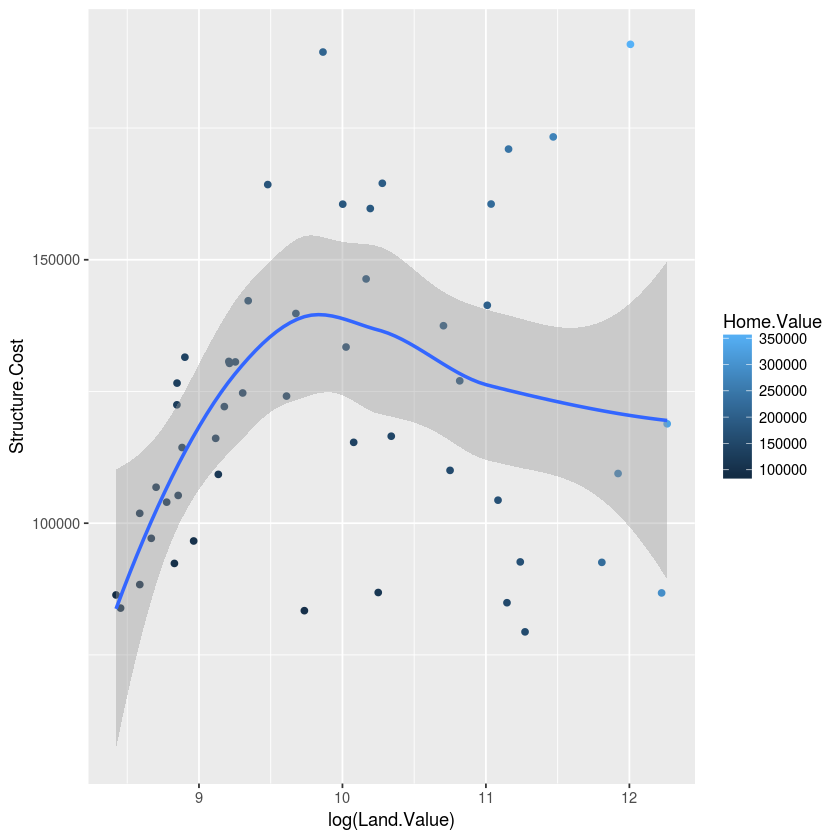

In [13]:
p1 +
  geom_point(aes(color = Home.Value)) +
  geom_smooth()

### Text (Label Points)

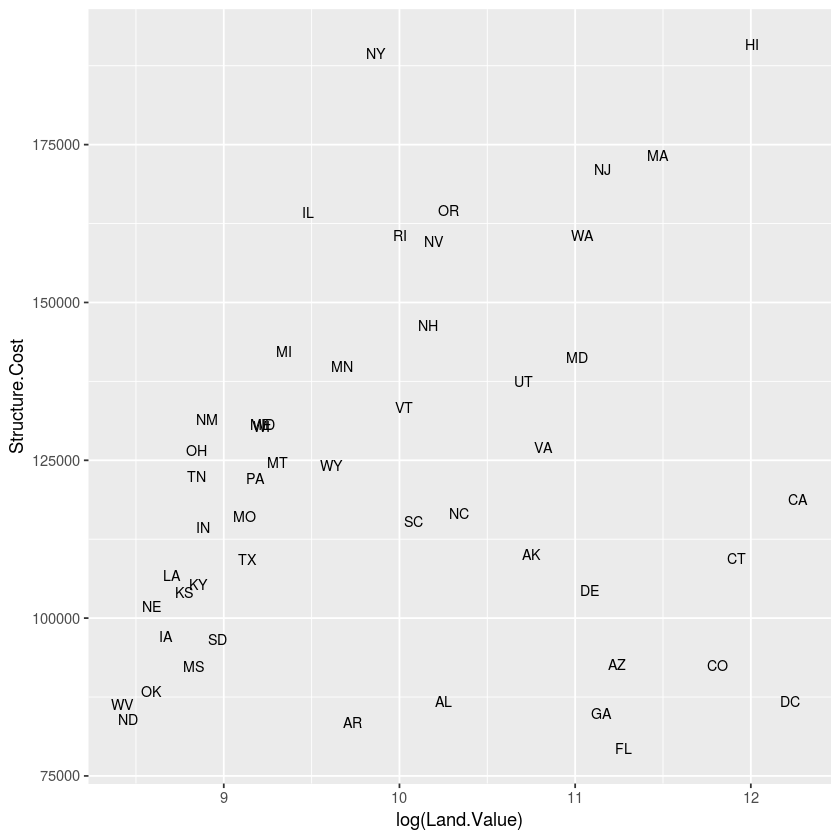

In [14]:
p1 + 
  geom_text(aes(label=State), size = 3)

In [23]:
install.packages("scales")

Warning message in install.packages("scales"):
“installation of package ‘scales’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [24]:
install.packages("ggrepel", type = "source", dependencies = TRUE)
## install.packages("ggrepel", repos="http://cran.us.r-project.org")

Warning message in install.packages("ggrepel", type = "source", dependencies = TRUE):
“installation of package ‘ggrepel’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
library("ggrepel")

p1 + 
  geom_point() + 
  geom_text_repel(aes(label=State), size = 3)

ERROR: Error in library("ggrepel"): there is no package called ‘ggrepel’


### Aesthetic Mapping VS Assignment

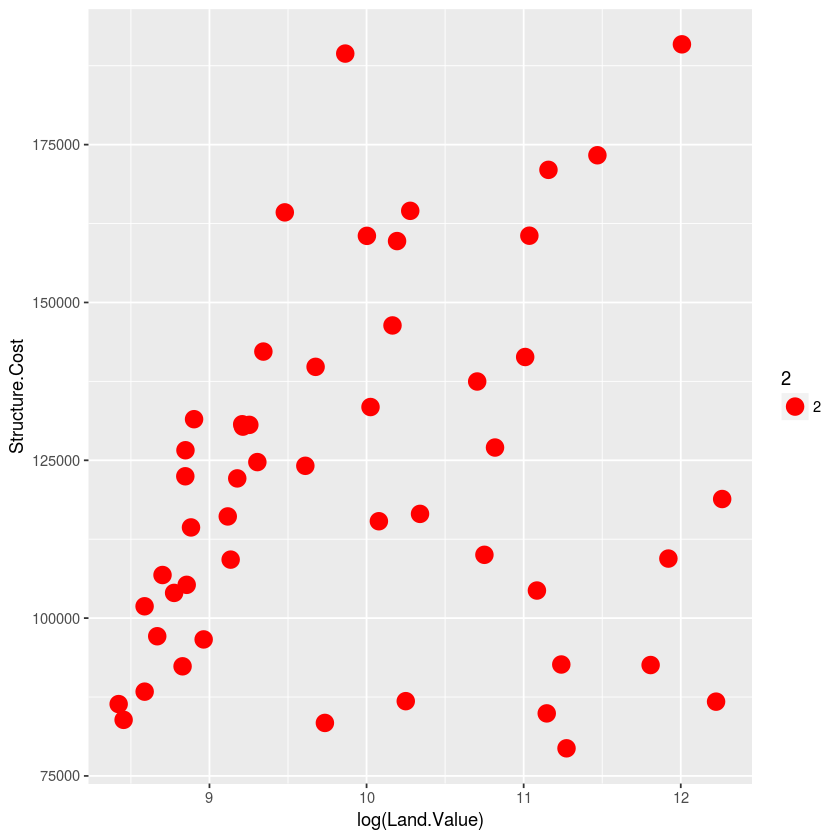

In [25]:
p1 +
  geom_point(aes(size = 2),# incorrect! 2 is not a variable
             color="red") # this is fine -- all points red

### Mapping Variables To Other Aesthetics

Warning message:
“Removed 1 rows containing missing values (geom_point).”

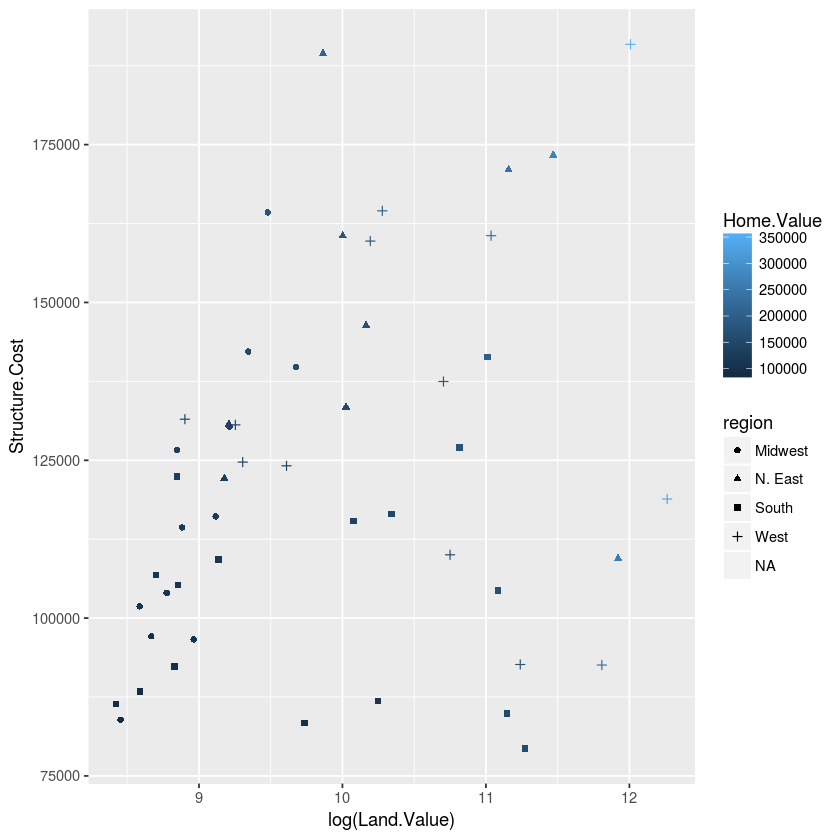

In [26]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

### Excercise I

These data consist of Human Development Index and Corruption Perception Index scores for several countries.

1) Create a scatter plot with CPI on the x axis and HDI on the y axis.

2) Color the points blue.

3) Map the color of the the points to Region.

4) Make the points bigger by setting size to 2

5) Map the size of the points to HDI.Rank

X Country     HDI.Rank HDI   CPI Region           
1 1 Afghanistan 172      0.398 1.5 Asia Pacific     
2 2 Albania      70      0.739 3.1 East EU Cemt Asia
3 3 Algeria      96      0.698 2.9 MENA             
4 4 Angola      148      0.486 2.0 SSA              
5 5 Argentina    45      0.797 3.0 Americas         
6 6 Armenia      86      0.716 2.6 East EU Cemt Asia

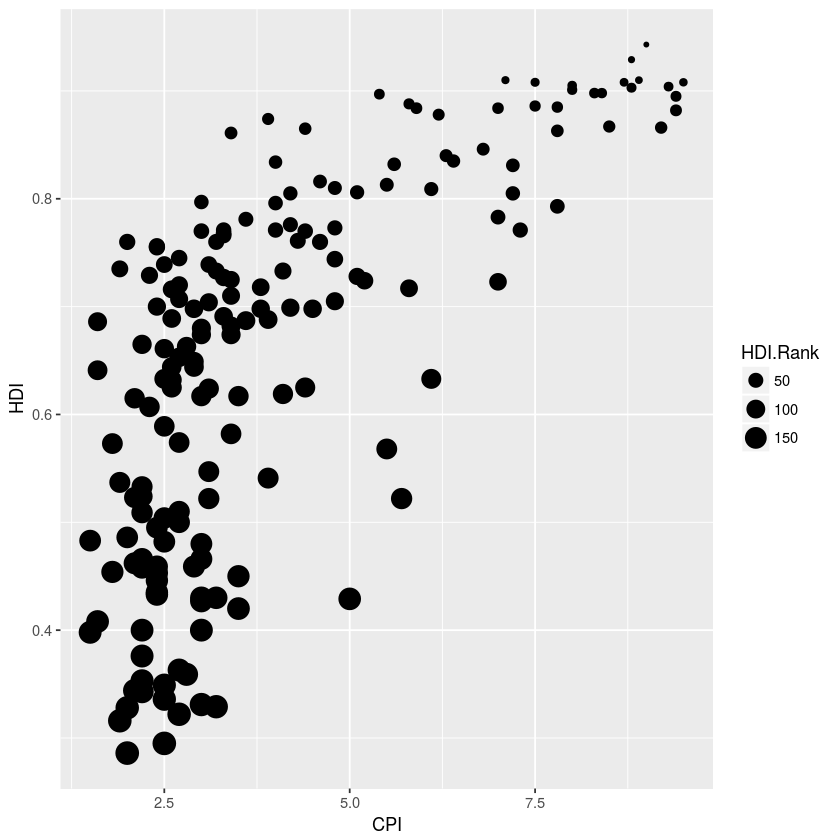

In [27]:
dat <- read.csv("Rgraphics/dataSets/EconomistData.csv")
head(dat)

ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point()

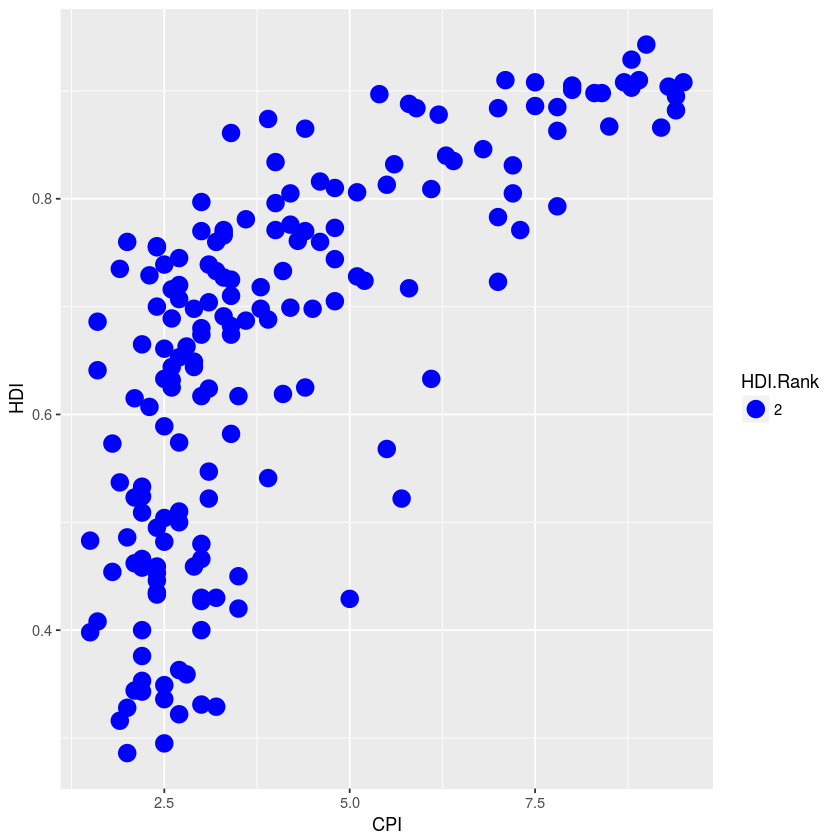

In [28]:
## 1), 2), 4) and 5)

ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point(aes(size = 2), color="blue")

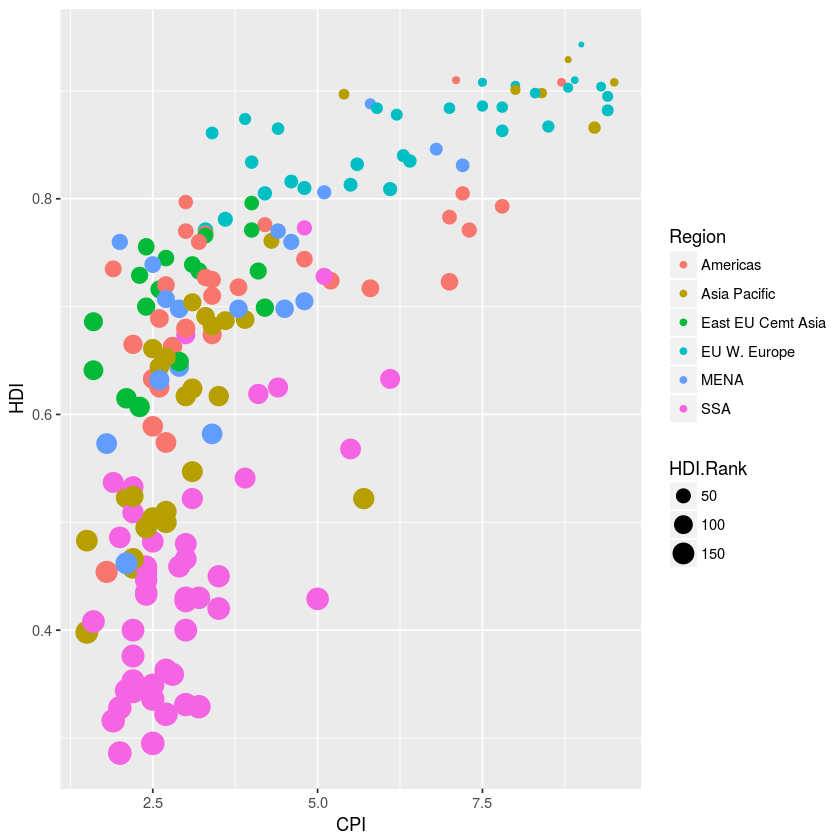

In [29]:
## 3)

ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point(aes(color=Region))

### Statistical Transformations

In [30]:
args(geom_histogram)
args(stat_bin)

function (mapping = NULL, data = NULL, stat = "bin", position = "stack", 
    ..., binwidth = NULL, bins = NULL, na.rm = FALSE, show.legend = NA, 
    inherit.aes = TRUE) 
NULL

function (mapping = NULL, data = NULL, geom = "bar", position = "stack", 
    ..., binwidth = NULL, bins = NULL, center = NULL, boundary = NULL, 
    breaks = NULL, closed = c("right", "left"), pad = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

### Setting Statistical Transformation Arguments

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


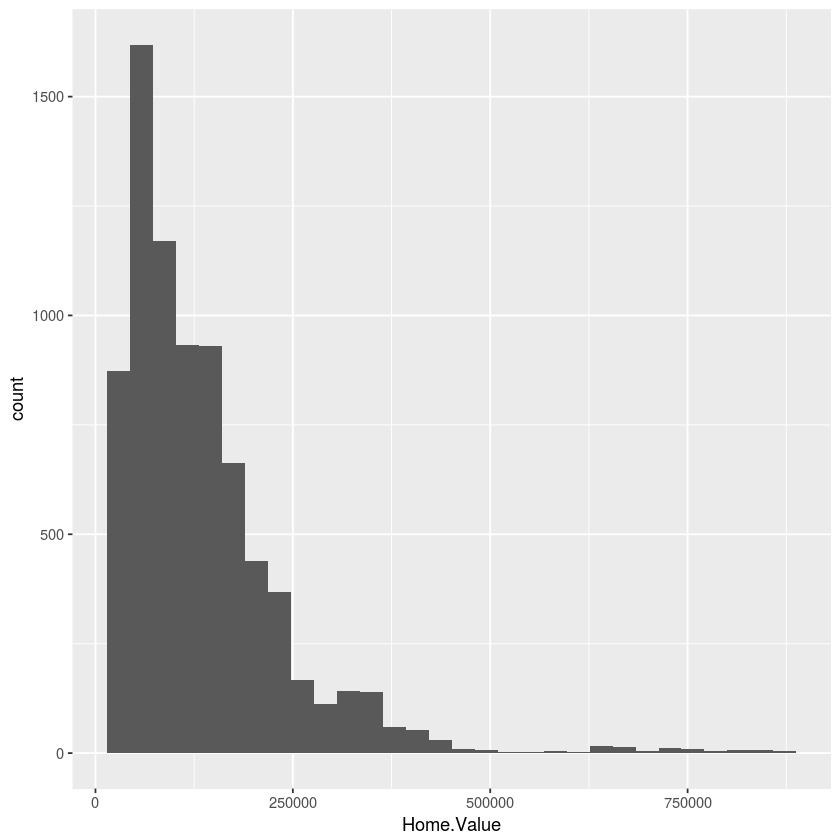

In [31]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

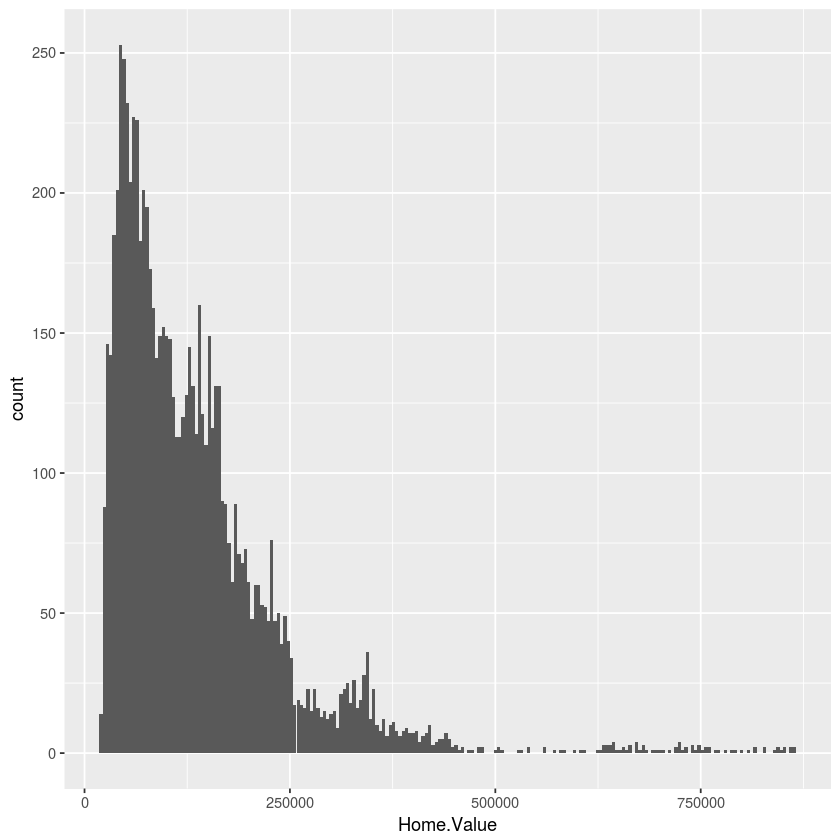

In [32]:
p2 + geom_histogram(stat = "bin", binwidth=4000)

### Changing The Statistical Transformation

In [33]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

State Home.Value
1  AK    147385.14 
2  AL     92545.22 
3  AR     82076.84 
4  AZ    140755.59 
5  CA    282808.08 
6  CO    158175.99 
46 VA    155391.44 
47 VT    132394.60 
48 WA    178522.58 
49 WI    108359.45 
50 WV     77161.71 
51 WY    122897.25

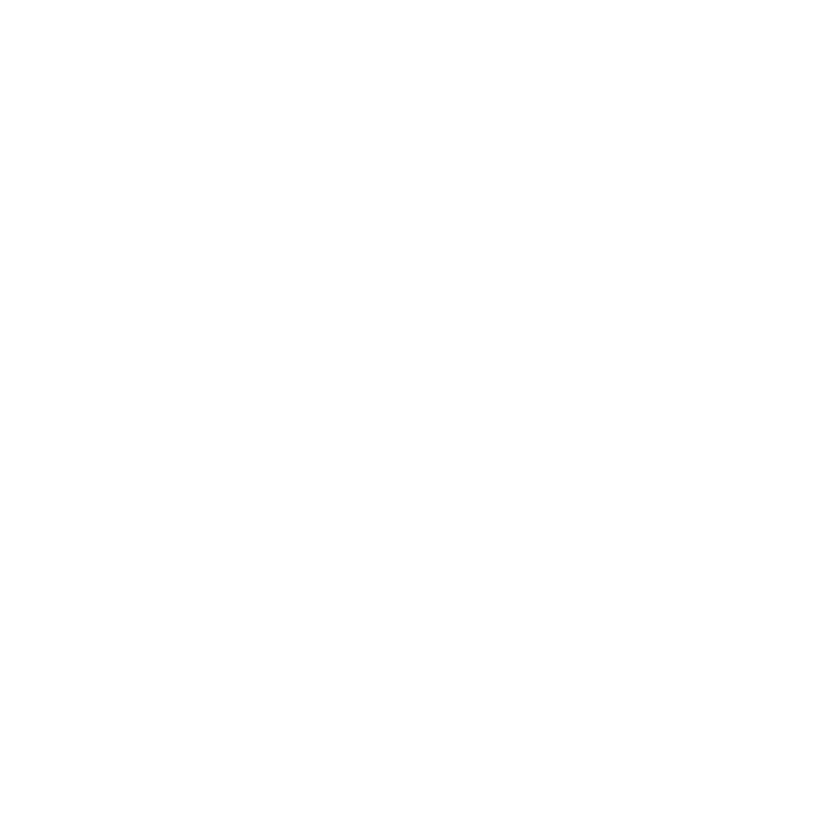

In [34]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar()

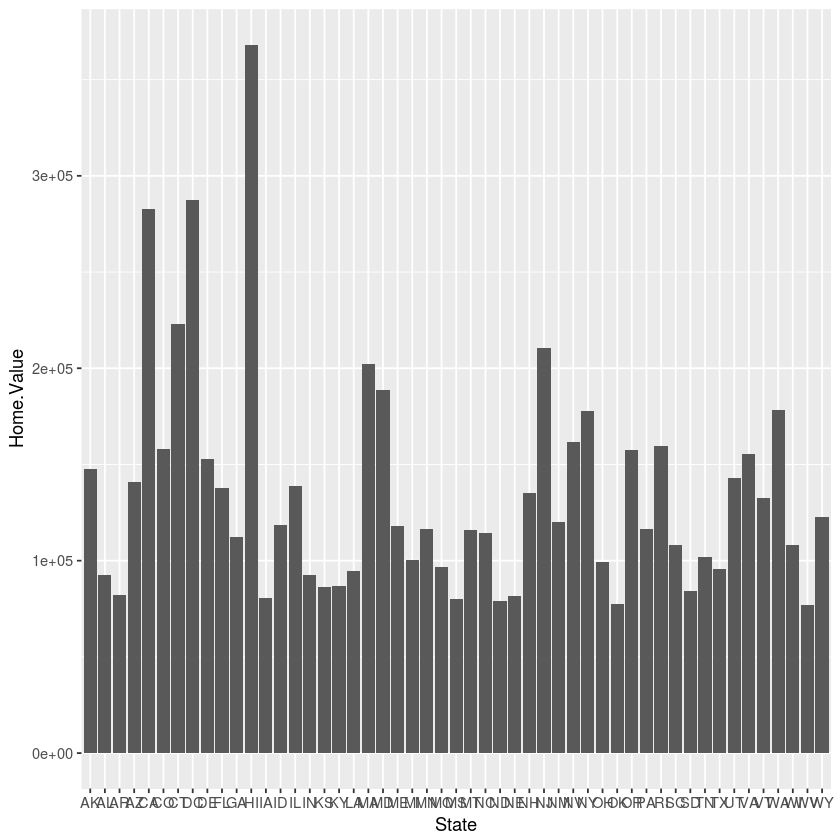

In [35]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity")

## Scales

### Scale Modification Examples

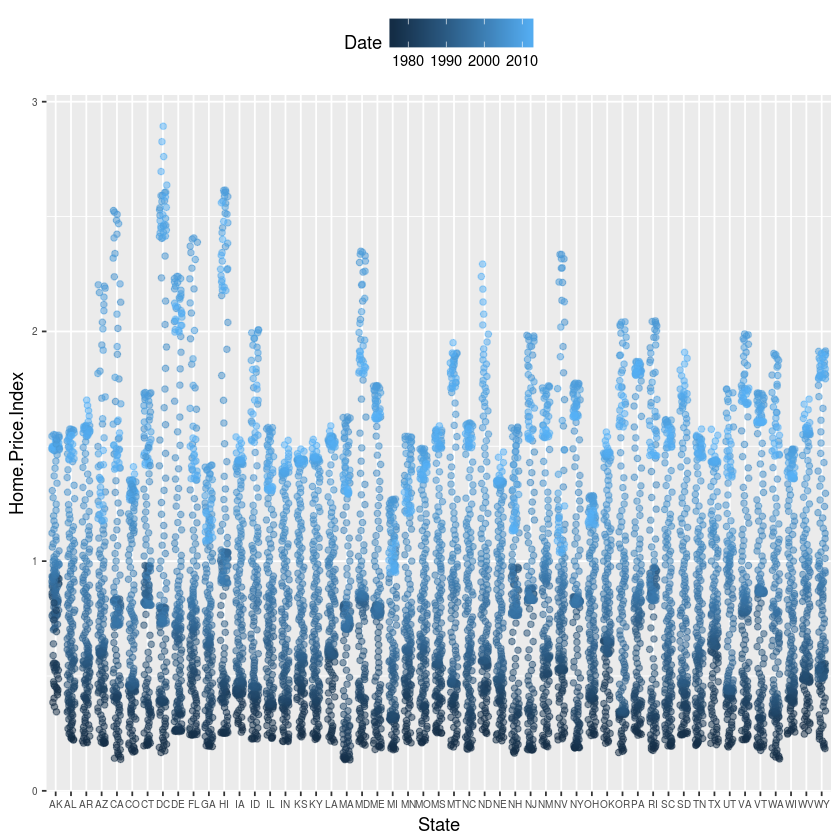

In [36]:
# Start by constructing a dotplot showing the distribution of home values by Date and State.


p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))


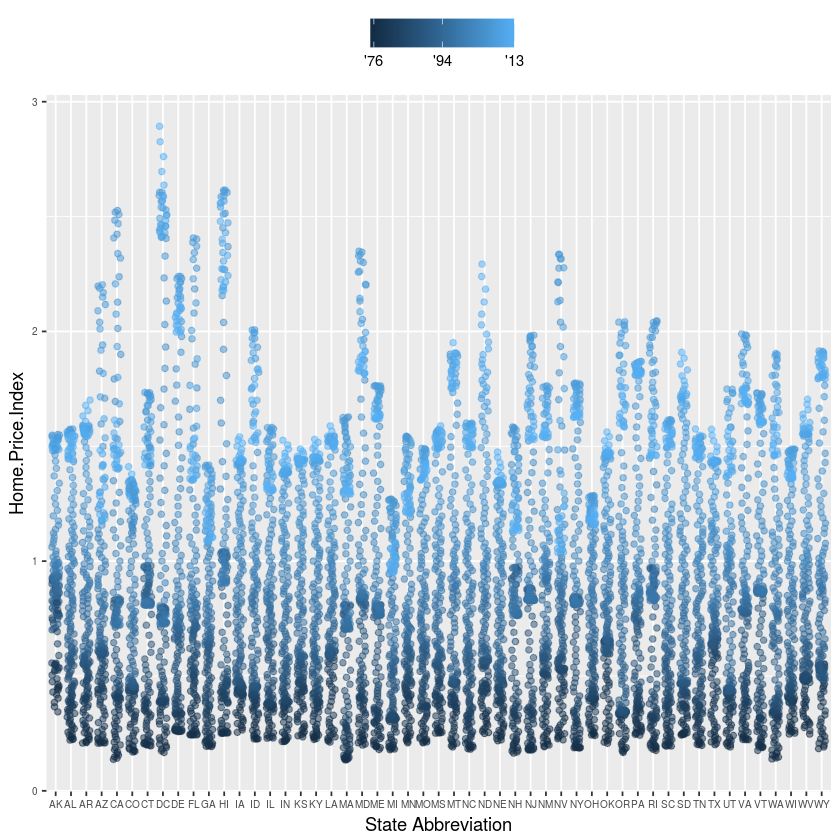

In [37]:
#Now modify the breaks for the x axis and color scales

p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

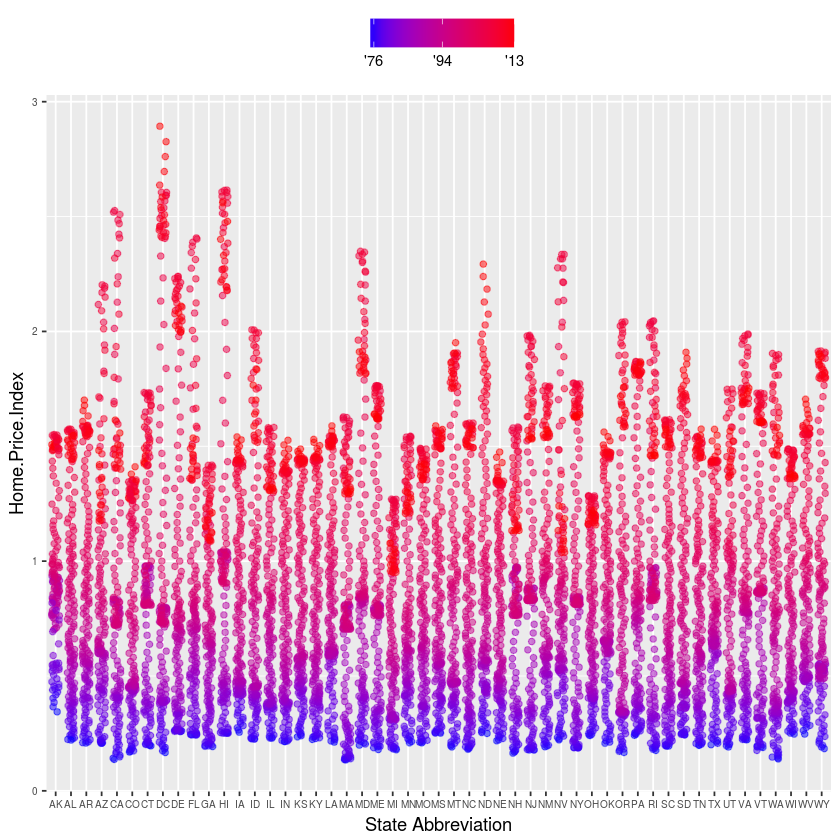

In [38]:
# Next change the low and high values to blue and red:

p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

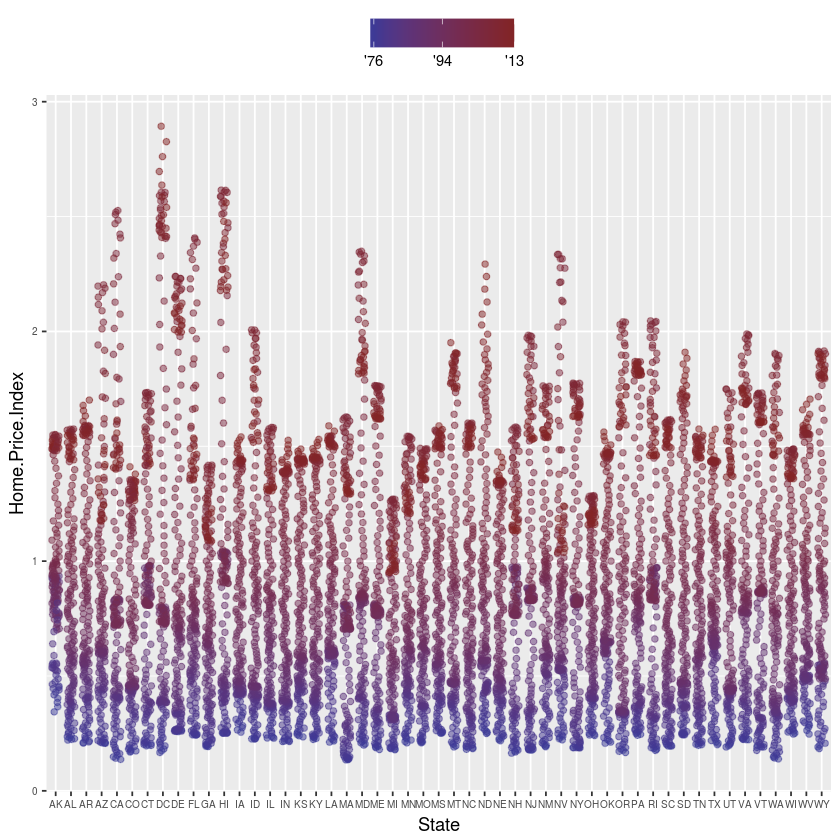

In [41]:
library(scales)

p4 +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = muted("blue"), high = muted("red"))

### Using different color scales

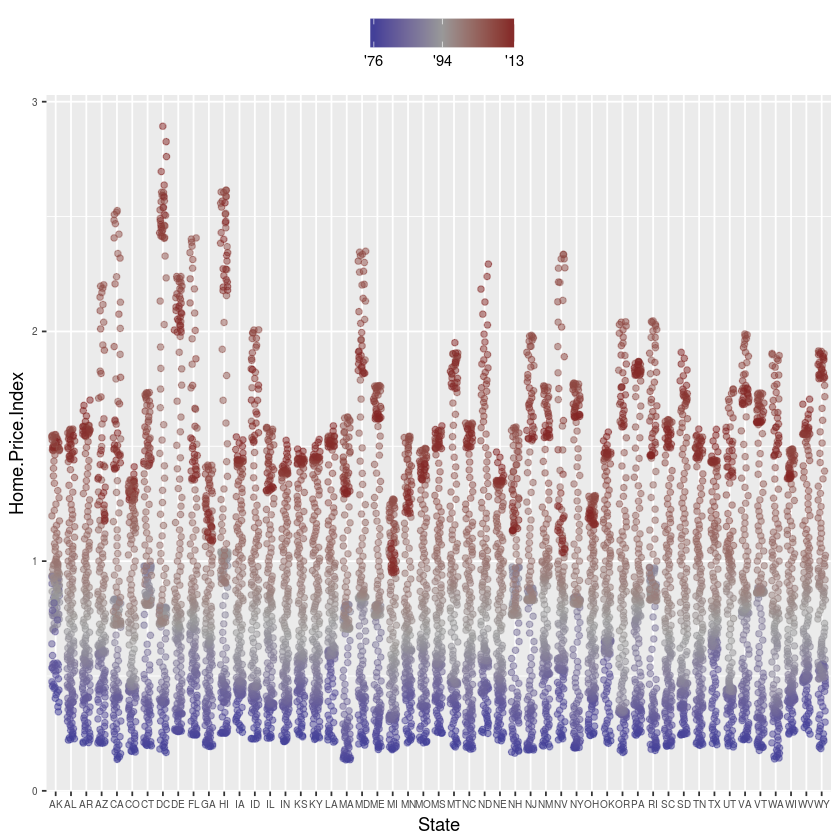

In [42]:
p4 +
  scale_color_gradient2(name="",
                        breaks = c(1976, 1994, 2013),
                        labels = c("'76", "'94", "'13"),
                        low = muted("blue"),
                        high = muted("red"),
                        mid = "gray60",
                        midpoint = 1994)

## Faceting

### What is the trend in housing prices in each state?

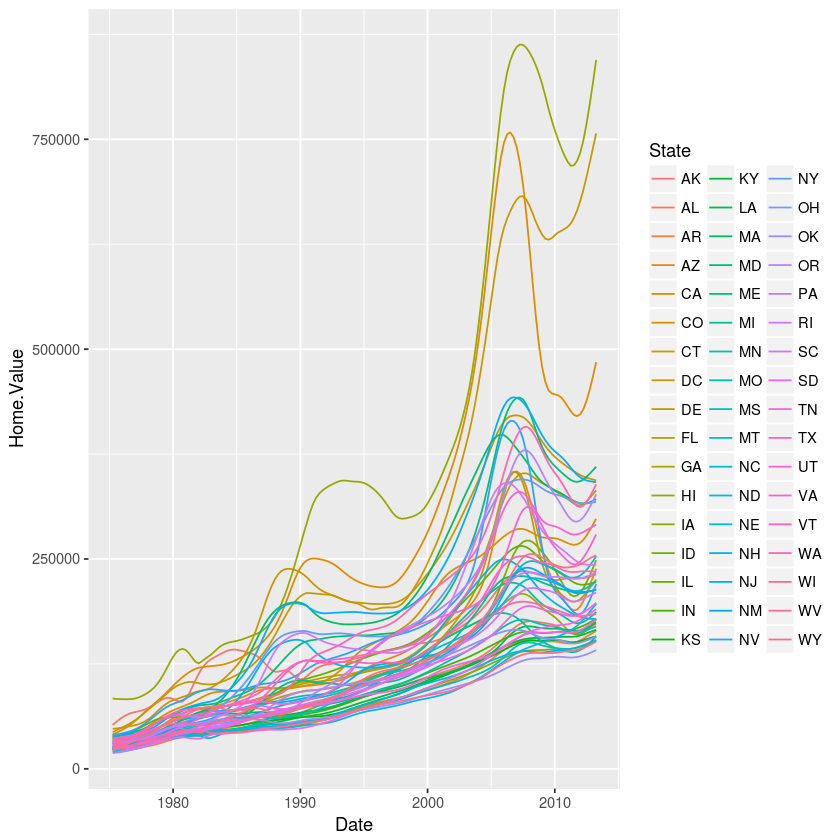

In [43]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

### Faceting to the rescue

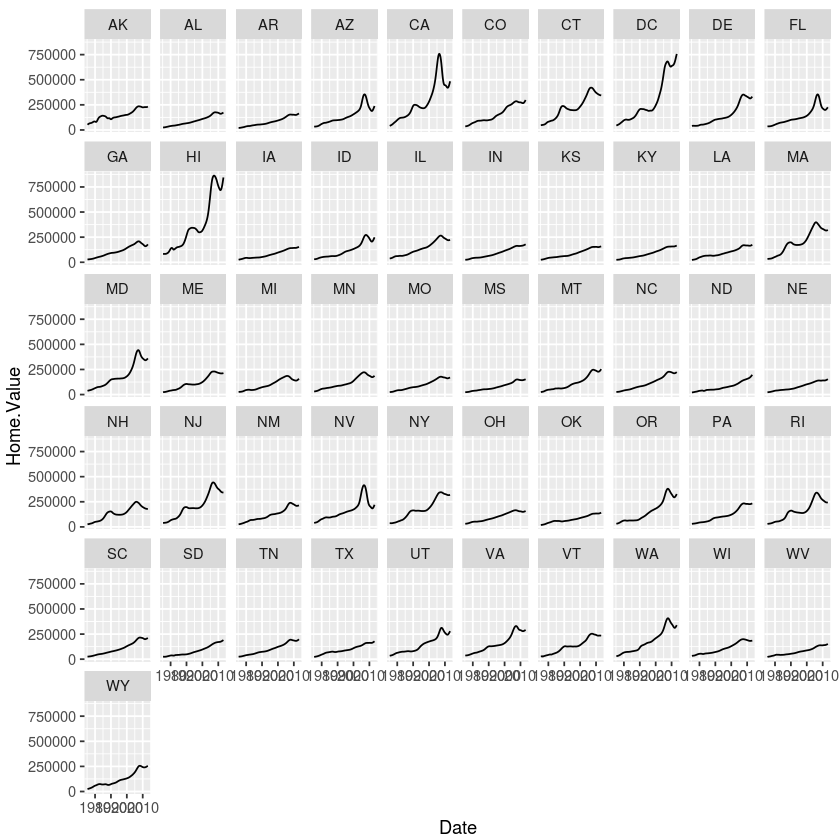

In [44]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

## Themes

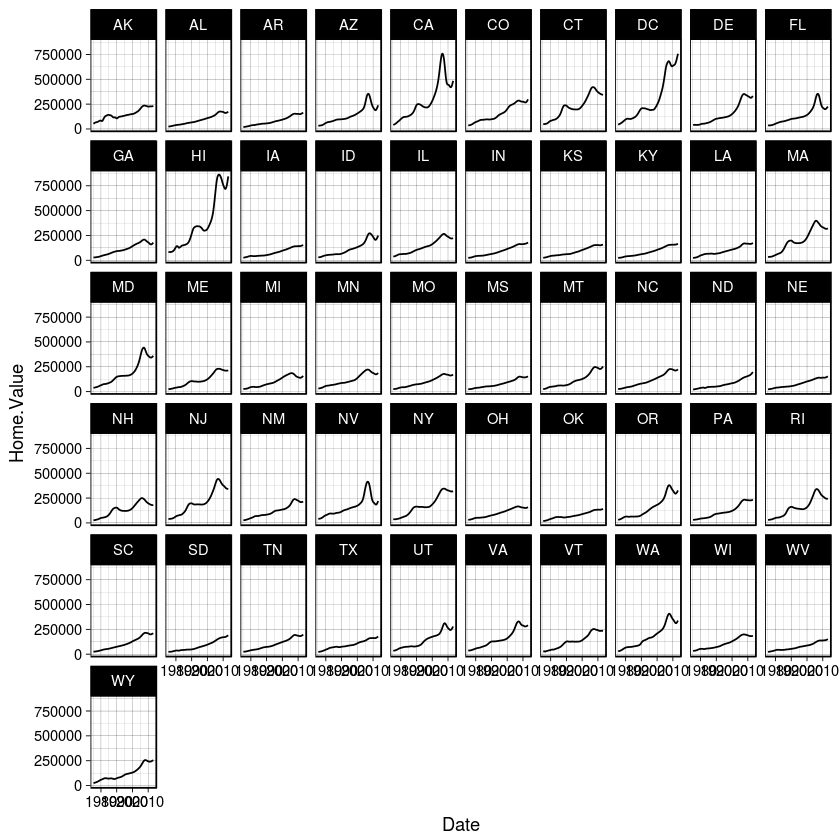

In [45]:
p5 + theme_linedraw()

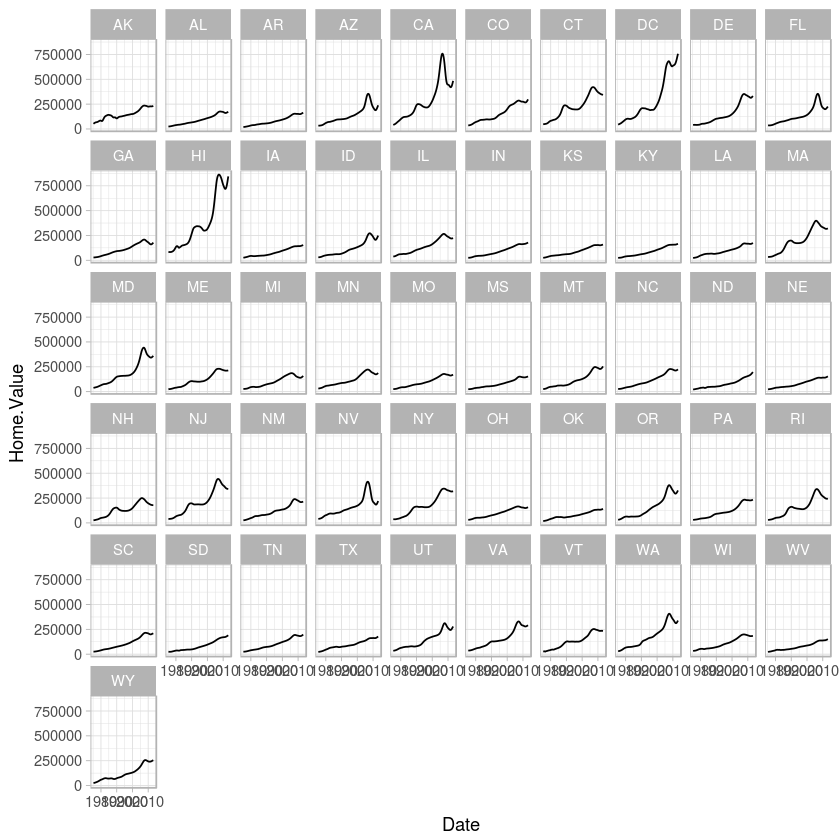

In [46]:
p5 + theme_light()

### Overriding theme defaults

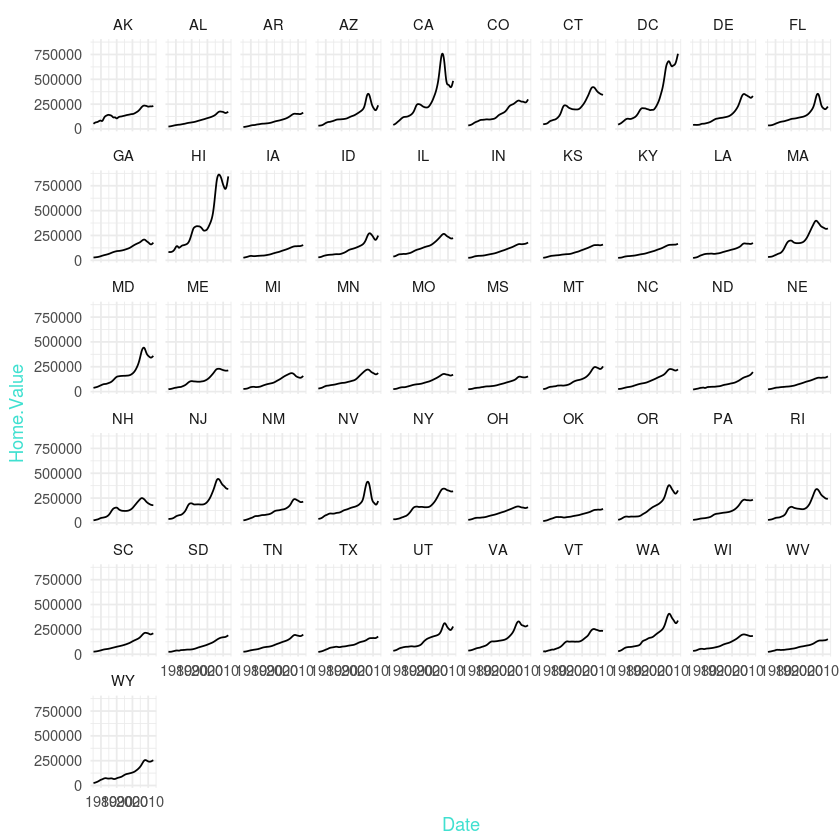

In [47]:
##Specific theme elements can be overridden using theme(). For example:

p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

### Creating and saving new themes

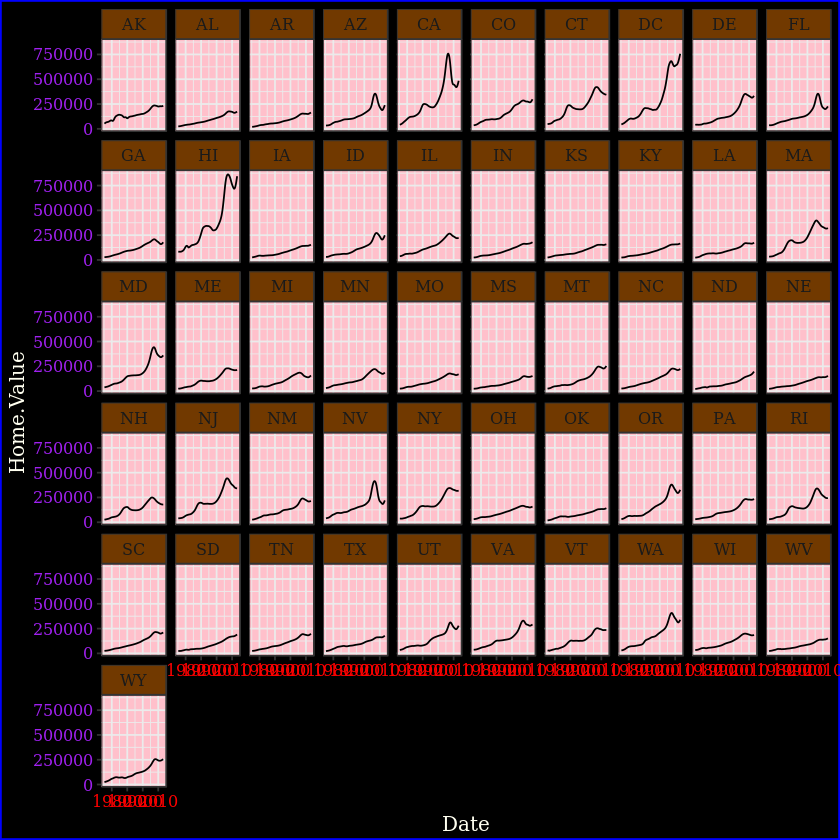

In [48]:
##You can create new themes, as in the following example:

theme_new <- theme_bw() +
  theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
        text=element_text(size = 12, family = "Serif", color = "ivory"),
        axis.text.y = element_text(colour = "purple"),
        axis.text.x = element_text(colour = "red"),
        panel.background = element_rect(fill = "pink"),
        strip.background = element_rect(fill = muted("orange")))

p5 + theme_new

### Map Aesthetic To Different Columns


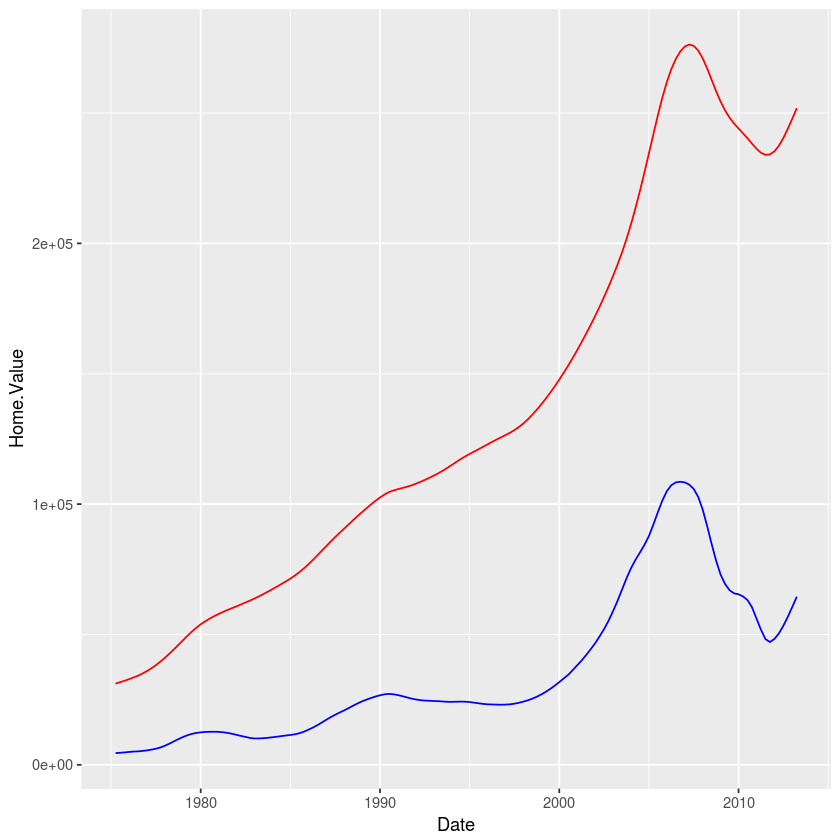

In [50]:
housing.byyear <- aggregate(cbind(Home.Value, Land.Value) ~ Date, data = housing, mean)


## WRONG WAY
ggplot(housing.byyear,
       aes(x=Date)) +
  geom_line(aes(y=Home.Value), color="red") +
  geom_line(aes(y=Land.Value), color="blue")

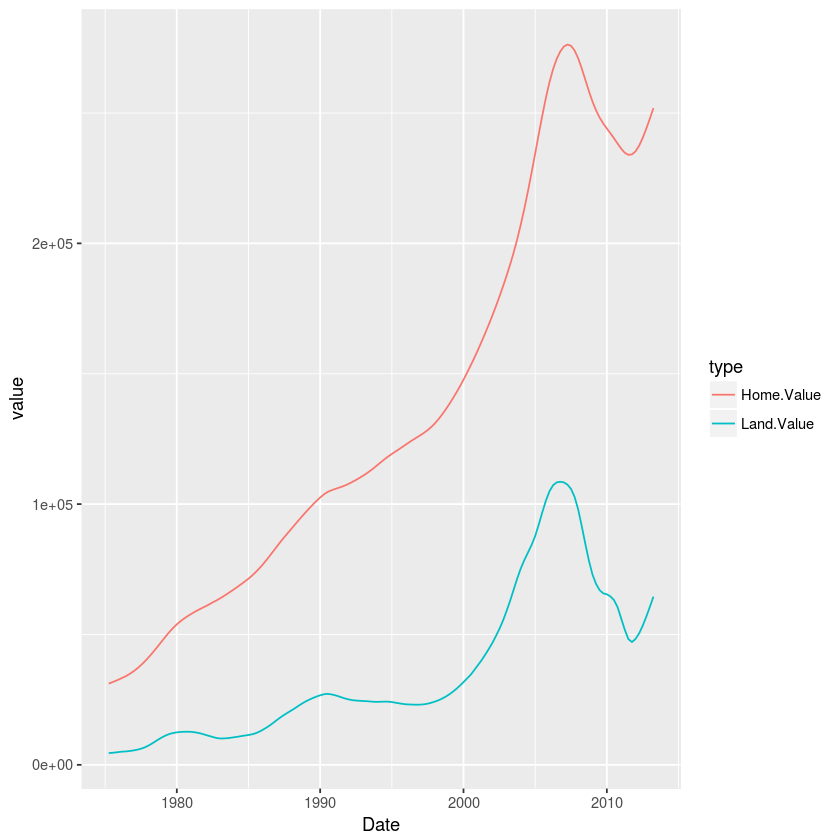

In [51]:
## RIGHT WAY

library(tidyr)
home.land.byyear <- gather(housing.byyear,
                           value = "value",
                           key = "type",
                           Home.Value, Land.Value)
ggplot(home.land.byyear,
       aes(x=Date,
           y=value,
           color=type)) +
  geom_line()

### References:

[1] http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html